# Introduction to Matplotlib

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
plt.plot()

[]

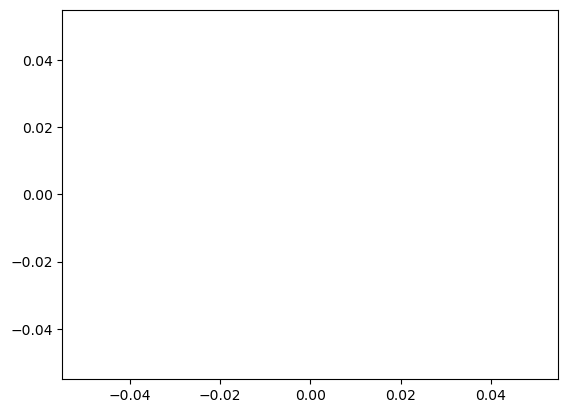

In [3]:
plt.plot()
plt.show()

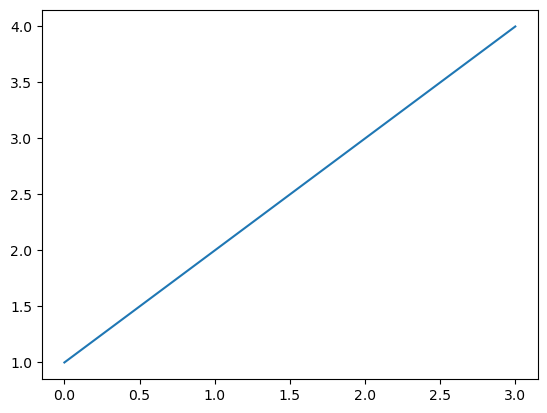

In [4]:
plt.plot([1,2,3,4])
plt.show()

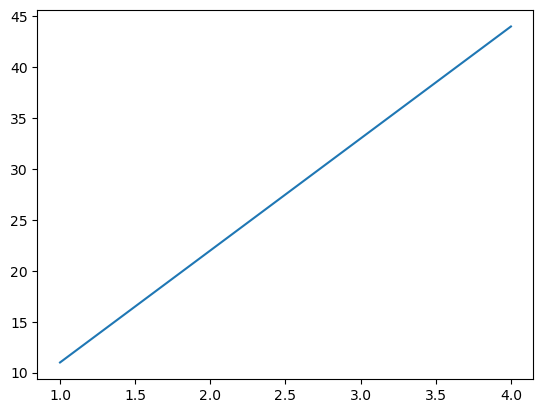

In [5]:
x = [1,2,3,4]
y = [11,22,33,44]
plt.plot(x,y)
plt.show()

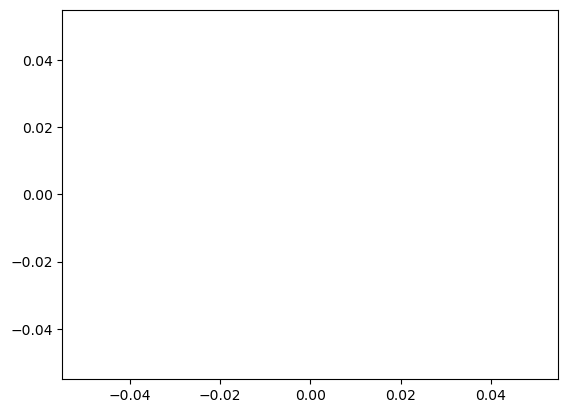

In [6]:
plt.plot()
plt.show()

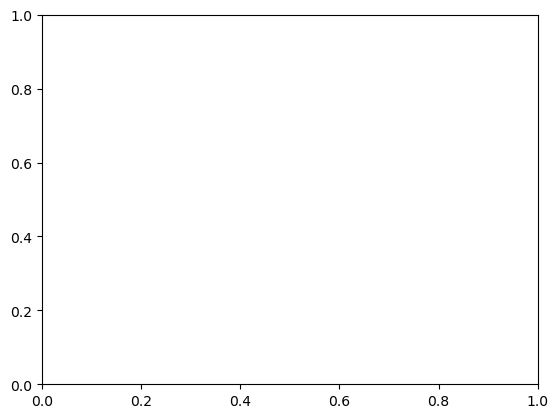

In [7]:
# 1st Method
fig = plt.figure()  # creates a figure
ax = fig.add_subplot()  # adds some axes
plt.show()

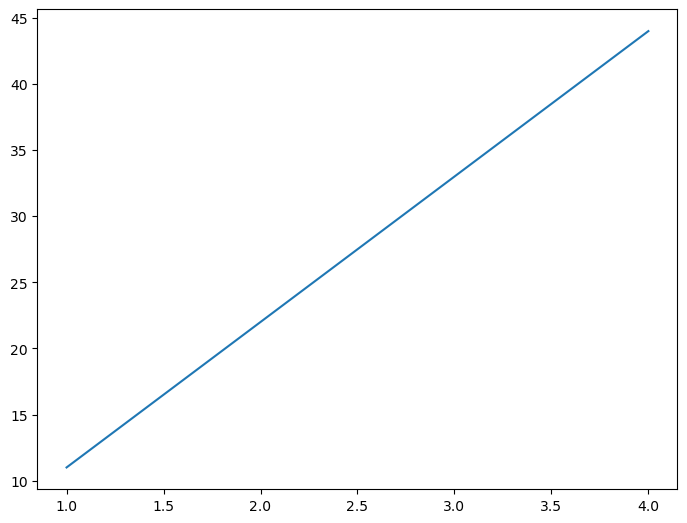

In [8]:
# 2nd Method
fig = plt.figure()  #creates a figure
ax = fig.add_axes([1,1,1,1])
ax.plot(x,y)  # add some data
plt.show()

In [9]:
plt.close('all')

# Matplotlib example workflow

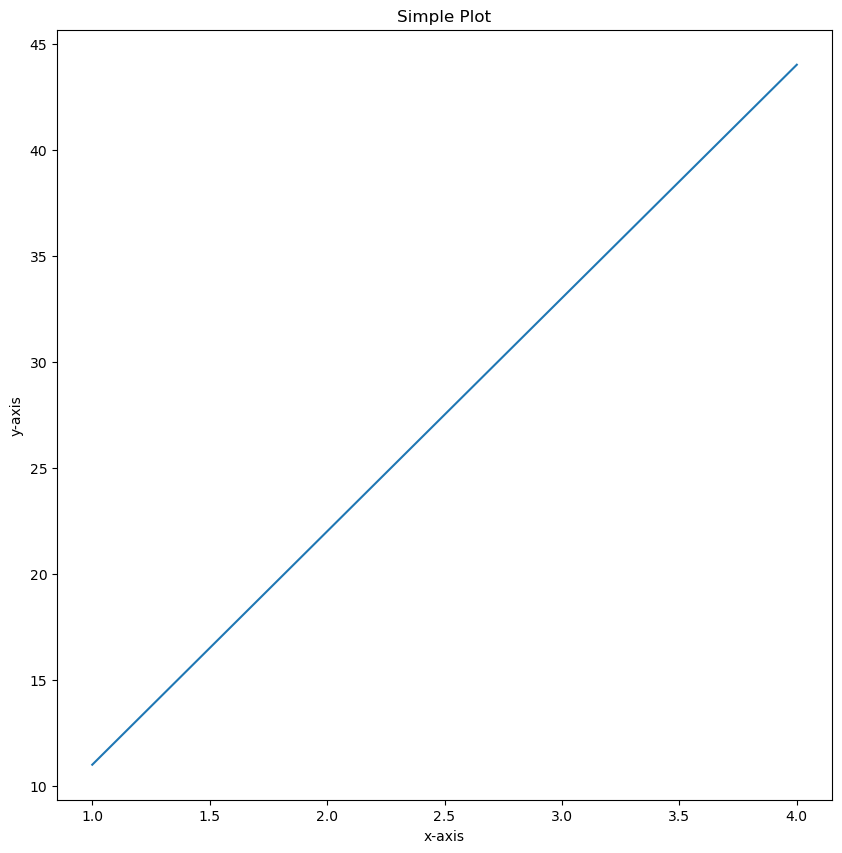

In [10]:
# 0. import matplotlib and get it ready for plotting in Jupyter
%matplotlib inline
import matplotlib.pyplot as plt


# 1. Prepare data
x = [1,2,3,4]
y = [11,22,33,44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10,10)) ## (width, height)

# 3. plot the data
ax.plot(x,y)

# 4. Customise plot
ax.set(title="Simple Plot",
      xlabel="x-axis",
      ylabel="y-axis")

# 5. Save and show (you save the whole figure)
fig.savefig("./sample-plot.png")


plt.show()

## Making figures with Numpy Arrays

We want:
* Line plot
* Scatter plot
* Bar plot
* Histogram
* Subplots

In [11]:
import numpy as np

In [12]:
# Create some data
x = np.linspace(0,10,100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

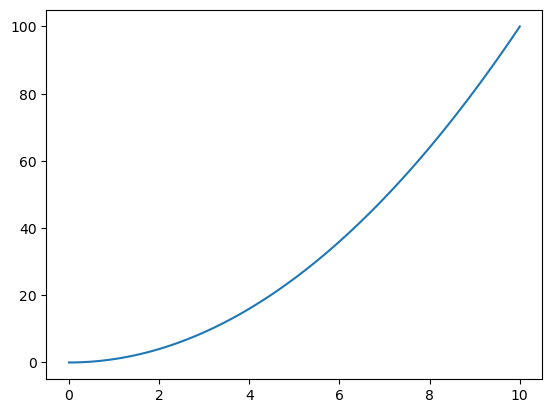

In [13]:
plt.close('all')

# Plot the data and create a line plot
fig, ax = plt.subplots()
ax.plot(x,x**2);
plt.show()

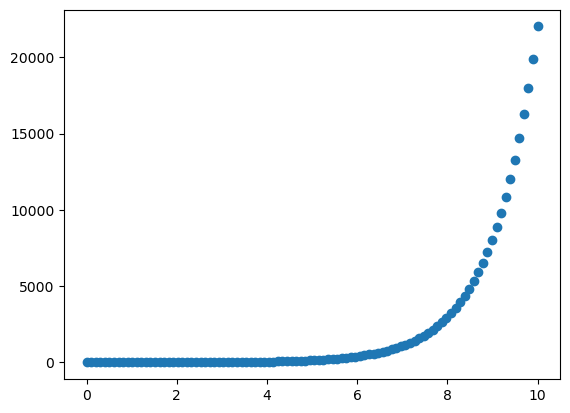

In [14]:
plt.close('all')

# Use some data to make Scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x))
plt.show()


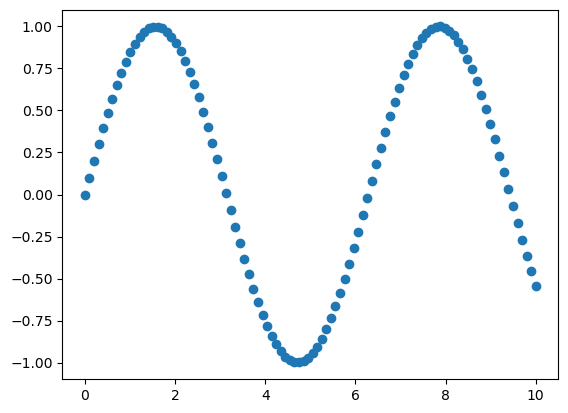

In [15]:
# Another Scatter plot
fig,ax = plt.subplots()
ax.scatter(x,np.sin(x))
plt.show()

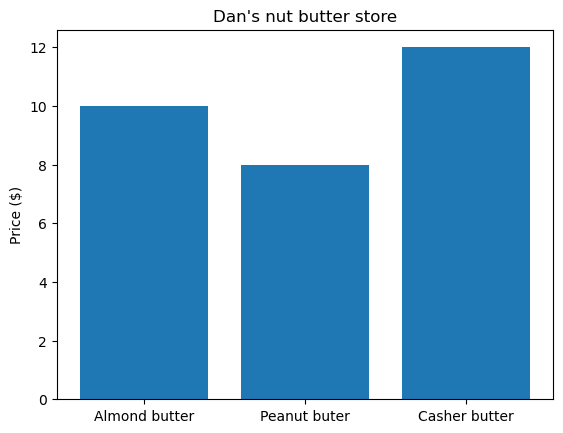

{'Almond butter': 10, 'Peanut buter': 8, 'Casher butter': 12}

In [16]:
plt.close("all")

# Make a plot from dictionary
nut_butter_prices = {"Almond butter":10,
                    "Peanut buter":8,
                    "Casher butter":12}
fig,ax = plt.subplots()
ax.bar(nut_butter_prices.keys(),nut_butter_prices.values())
ax.set(title="Dan's nut butter store",
      ylabel="Price ($)")
plt.show()

nut_butter_prices

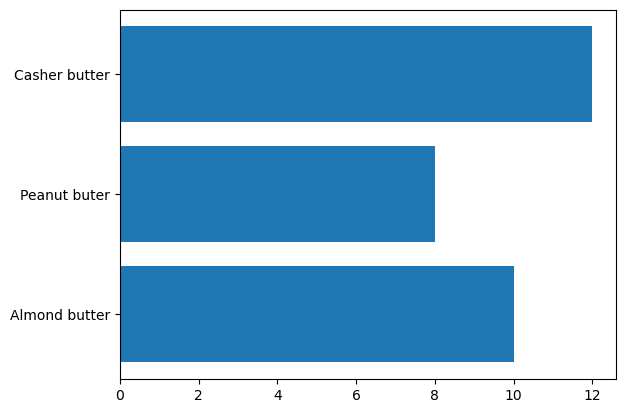

In [17]:
plt.close("all")

# Horizontal Bar graph
fig,ax = plt.subplots()
ax.barh(nut_butter_prices.keys(),nut_butter_prices.values())
plt.show()

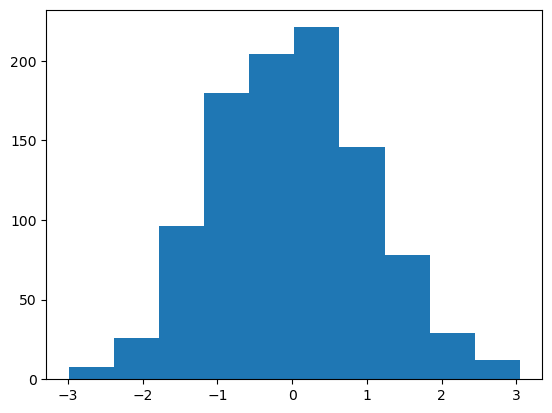

In [18]:
plt.close("all")

# Make some data for histograms and plot it
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x)
plt.show()

### Two Options for subplots

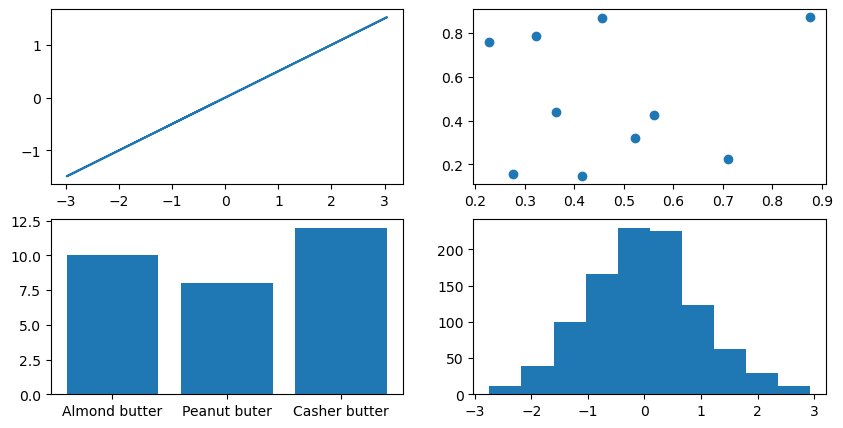

In [19]:
# Subplot option 1 
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2,
                                          ncols=2,
                                          figsize=(10,5))
# Plot to each different axis
ax1.plot(x,x/2)
ax2.scatter(np.random.random(10), np.random.random(10))
ax3.bar(nut_butter_prices.keys(),nut_butter_prices.values())
ax4.hist(np.random.randn(1000))

plt.show()

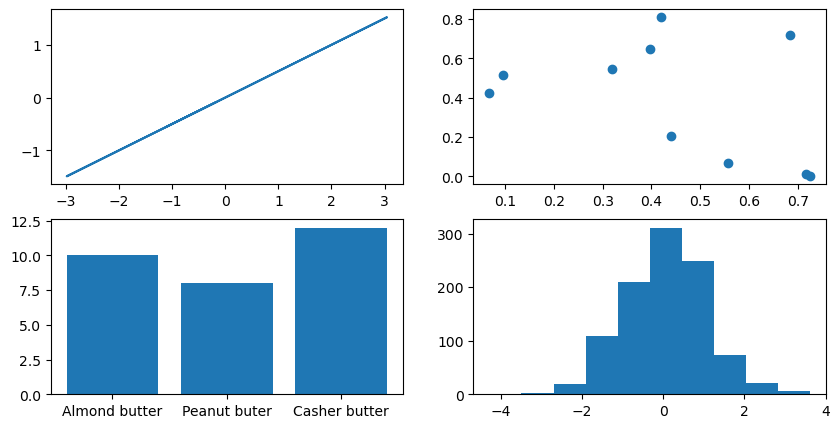

In [20]:
plt.close("all")

# Subplot option 2
fig,ax = plt.subplots(nrows=2,
                     ncols=2,
                     figsize=(10,5))

# Plot to each different index
ax[0,0].plot(x,x/2)
ax[0,1].scatter(np.random.random(10),np.random.random(10))
ax[1,0].bar(nut_butter_prices.keys(),nut_butter_prices.values())
ax[1,1].hist(np.random.randn(1000))


plt.show()



# Plotting from Pandas DataFrame

In [21]:
import pandas as pd

In [22]:
# Make a DataFrame
car_sales = pd.read_csv("car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


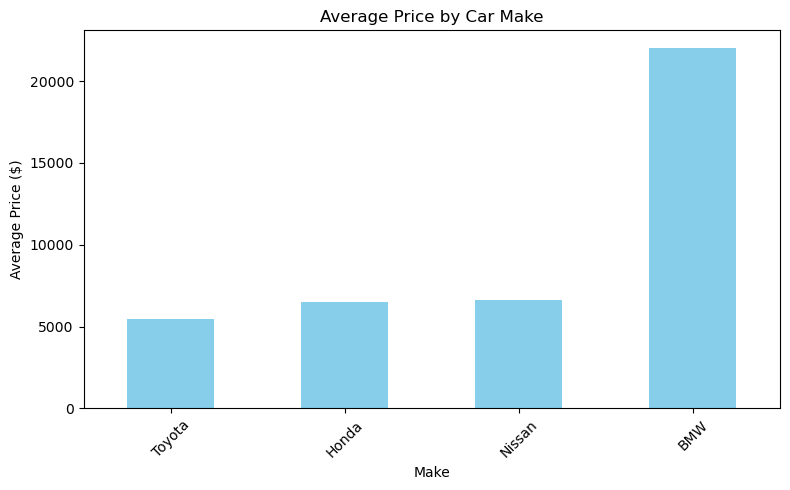

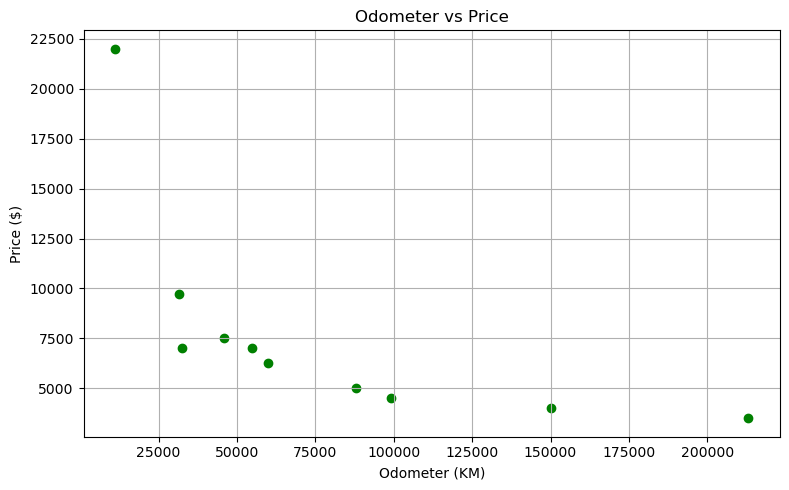

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
car_sales = pd.read_csv("car-sales.csv")

# --- Clean the 'Price' column (handles mixed types) ---
car_sales['Price'] = car_sales['Price'].apply(lambda x: float(str(x).replace('$', '').replace(',', '').strip()))

# --- Optional: Clean 'Odometer (KM)' if needed ---
if car_sales['Odometer (KM)'].dtype == 'object':
    car_sales['Odometer (KM)'] = car_sales['Odometer (KM)'].str.replace(',', '').astype(int)

# --- 1. Average Price by Make ---
plt.figure(figsize=(8, 5))
car_sales.groupby('Make')['Price'].mean().sort_values().plot(kind='bar', color='skyblue')
plt.title('Average Price by Car Make')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 2. Odometer vs Price ---
plt.figure(figsize=(8, 5))
plt.scatter(car_sales['Odometer (KM)'], car_sales['Price'], c='green')
plt.title('Odometer vs Price')
plt.xlabel('Odometer (KM)')
plt.ylabel('Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()




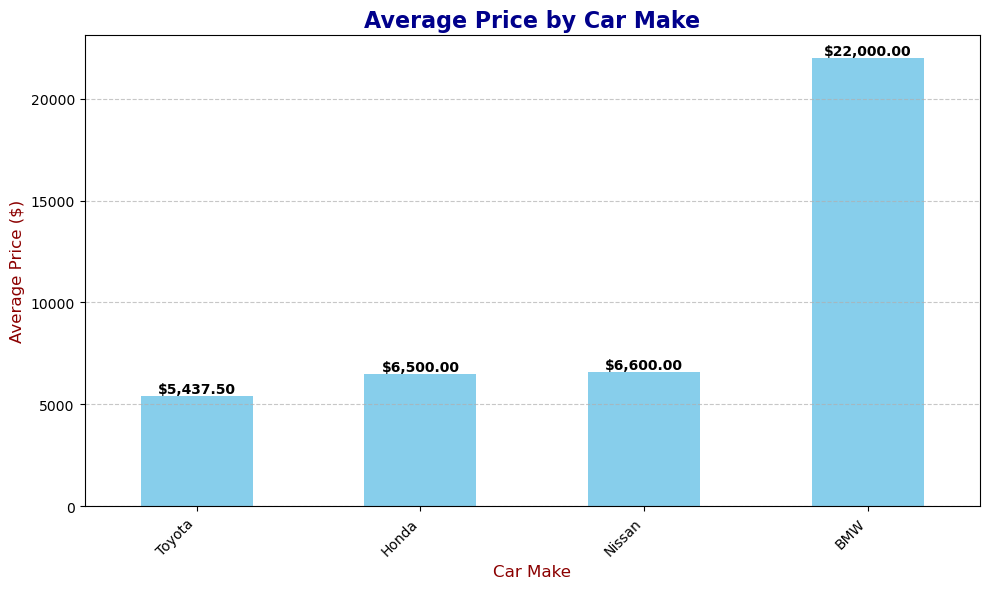

In [24]:
# Clean 'Price' column (removes dollar signs, commas, and converts to float)
car_sales['Price'] = car_sales['Price'].apply(lambda x: float(str(x).replace('$', '').replace(',', '').strip()))

# --- 1. Average Price by Make ---
plt.figure(figsize=(10, 6))  # Increase figure size for better visibility
ax = car_sales.groupby('Make')['Price'].mean().sort_values().plot(kind='bar', color='skyblue')

# Title and axis labels
plt.title('Average Price by Car Make', fontsize=16, fontweight='bold', color='darkblue')
plt.ylabel('Average Price ($)', fontsize=12, color='darkred')
plt.xlabel('Car Make', fontsize=12, color='darkred')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of each bar
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.2f}',  # Format the value with a dollar sign and comma separator
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position the text at the center of the bar
                ha='center', va='center',  # Horizontal and vertical alignment
                fontsize=10, color='black', fontweight='bold', xytext=(0, 5), textcoords='offset points')

# Rotate x-tick labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust layout to make sure everything fits
plt.tight_layout()

# Show plot
plt.show()

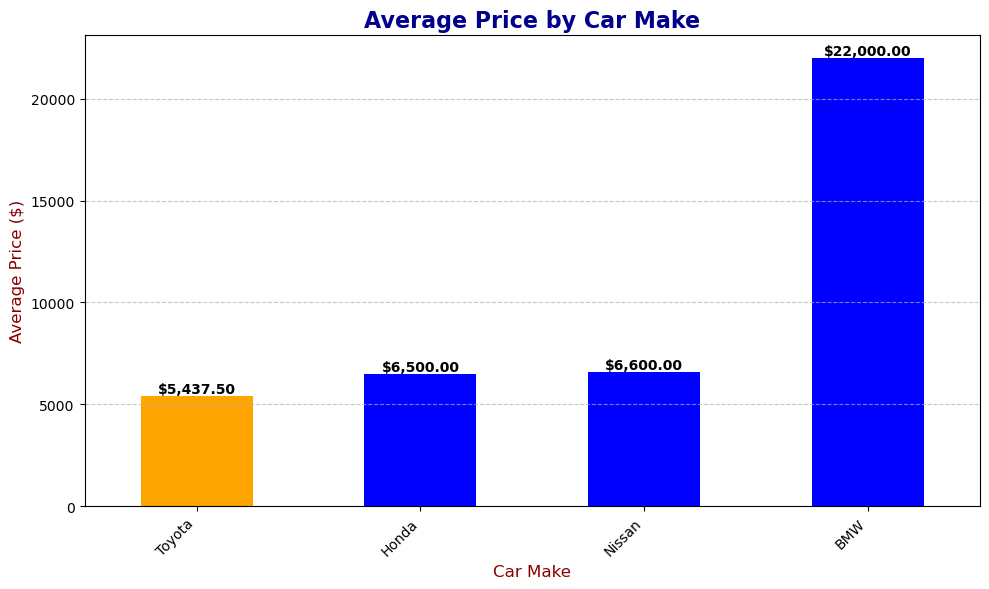

In [25]:
# Clean 'Price' column (removes dollar signs, commas, and converts to float)
car_sales['Price'] = car_sales['Price'].apply(lambda x: float(str(x).replace('$', '').replace(',', '').strip()))

# --- 1. Average Price by Make ---
plt.figure(figsize=(10, 6))  # Increase figure size for better visibility

# Create bar plot and get the Axes object
ax = car_sales.groupby('Make')['Price'].mean().sort_values().plot(kind='bar', color=['orange' if price < 6000 else 'blue' for price in car_sales.groupby('Make')['Price'].mean().sort_values()])

# Title and axis labels
plt.title('Average Price by Car Make', fontsize=16, fontweight='bold', color='darkblue')
plt.ylabel('Average Price ($)', fontsize=12, color='darkred')
plt.xlabel('Car Make', fontsize=12, color='darkred')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of each bar
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.2f}',  # Format the value with a dollar sign and comma separator
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position the text at the center of the bar
                ha='center', va='center',  # Horizontal and vertical alignment
                fontsize=10, color='black', fontweight='bold', xytext=(0, 5), textcoords='offset points')

# Rotate x-tick labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust layout to make sure everything fits
plt.tight_layout()

# Show plot
plt.show()

## Plotting from Pandas DataFrame

In [26]:
import pandas as pd

In [27]:
# Make a dataframe
car_sales = pd.read_csv("car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


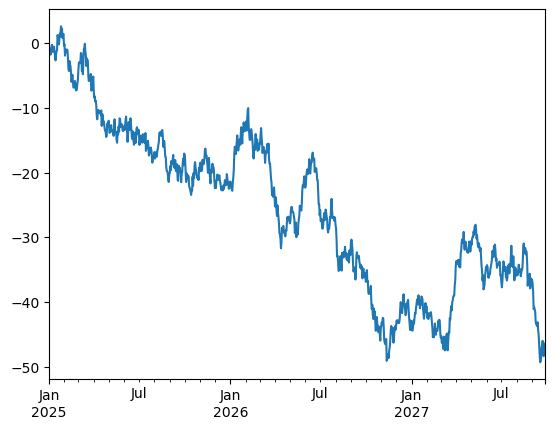

In [28]:
ts = pd.Series(np.random.randn(1000), 
               index=pd.date_range("1/1/2025", periods=1000))
ts = ts.cumsum()
ts.plot()
plt.show()

In [29]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [30]:
car_sales['Price'] = car_sales['Price'].str.replace(r'[\$\,\.]', '', regex=True)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [31]:
type(car_sales["Price"][0])

str

In [32]:
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [33]:
car_sales["Sale Date"] = pd.date_range("1/1/2025", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2025-01-01
1,Honda,Red,87899,4,5000,2025-01-02
2,Toyota,Blue,32549,3,7000,2025-01-03
3,BMW,Black,11179,5,22000,2025-01-04
4,Nissan,White,213095,4,3500,2025-01-05
5,Toyota,Green,99213,4,4500,2025-01-06
6,Honda,Blue,45698,4,7500,2025-01-07
7,Honda,Blue,54738,4,7000,2025-01-08
8,Toyota,White,60000,4,6250,2025-01-09
9,Nissan,White,31600,4,9700,2025-01-10


In [34]:
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2025-01-01,4000
1,Honda,Red,87899,4,5000,2025-01-02,9000
2,Toyota,Blue,32549,3,7000,2025-01-03,16000
3,BMW,Black,11179,5,22000,2025-01-04,38000
4,Nissan,White,213095,4,3500,2025-01-05,41500
5,Toyota,Green,99213,4,4500,2025-01-06,46000
6,Honda,Blue,45698,4,7500,2025-01-07,53500
7,Honda,Blue,54738,4,7000,2025-01-08,60500
8,Toyota,White,60000,4,6250,2025-01-09,66750
9,Nissan,White,31600,4,9700,2025-01-10,76450


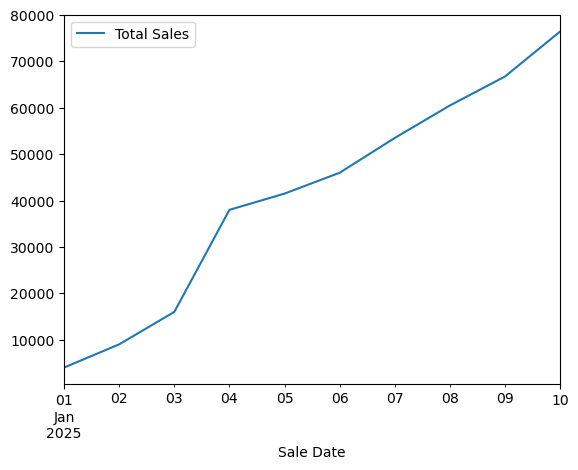

In [35]:
plt.close("All")
# Plot the total sales
car_sales.plot(x="Sale Date", y="Total Sales")
plt.show()

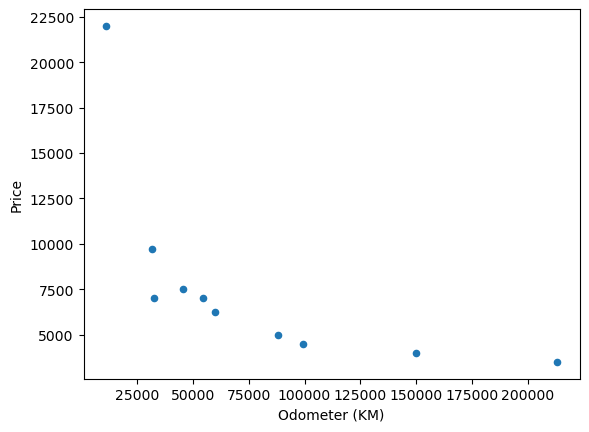

In [36]:
# Plot scater plot
car_sales["Price"] = car_sales["Price"].astype(int)

car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter")
plt.show()

In [37]:
# How about a bar graph
x = np.random.rand(10,4)

# Turn it into a data frame
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.870933,0.767933,0.390486,0.608441
1,0.755334,0.977711,0.127416,0.468852
2,0.877210,0.261376,0.403812,0.431718
3,0.036940,0.450736,0.750191,0.352502
4,0.390012,0.479688,0.039462,0.023509
5,0.854253,0.897484,0.541410,0.711476
6,0.218802,0.598902,0.482008,0.449659
7,0.102674,0.647821,0.635494,0.731505
8,0.536377,0.940395,0.987078,0.399119
9,0.077768,0.924948,0.288434,0.995850


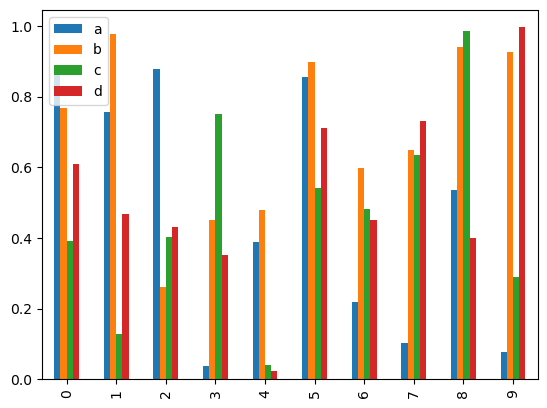

In [38]:
plt.close()
df.plot.bar();
plt.show()

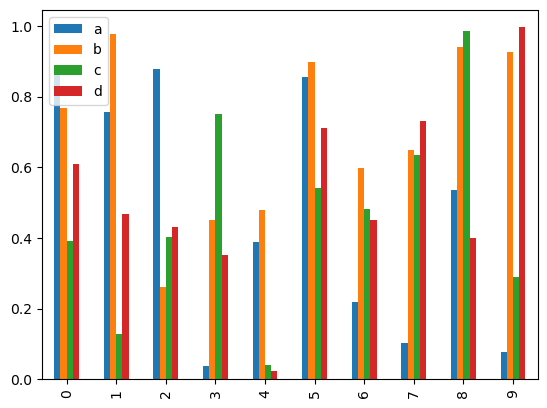

In [39]:
df.plot(kind="bar")
plt.show()

In [40]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2025-01-01,4000
1,Honda,Red,87899,4,5000,2025-01-02,9000
2,Toyota,Blue,32549,3,7000,2025-01-03,16000
3,BMW,Black,11179,5,22000,2025-01-04,38000
4,Nissan,White,213095,4,3500,2025-01-05,41500
5,Toyota,Green,99213,4,4500,2025-01-06,46000
6,Honda,Blue,45698,4,7500,2025-01-07,53500
7,Honda,Blue,54738,4,7000,2025-01-08,60500
8,Toyota,White,60000,4,6250,2025-01-09,66750
9,Nissan,White,31600,4,9700,2025-01-10,76450


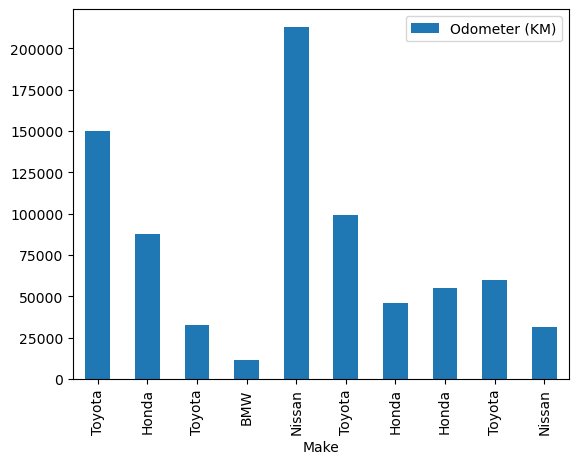

In [41]:
plt.close()
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar")
plt.show()

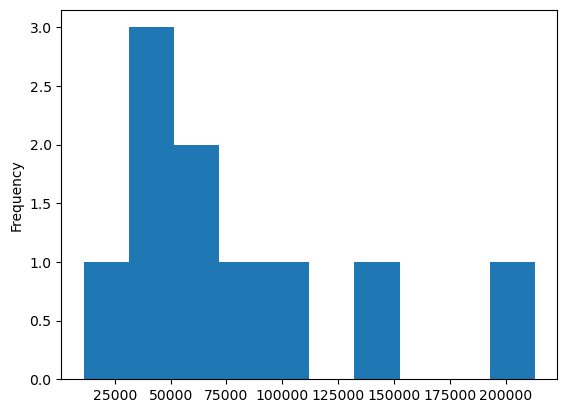

In [42]:
# How about histograms

plt.close()

car_sales["Odometer (KM)"].plot.hist()

plt.show()

In [43]:
# Let's try on another dataset
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [44]:
heart_disease.shape

(303, 14)

In [45]:
heart_disease.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [46]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Data Dictionary

['age', 
'sex', 
'cp', 
'trestbps', 
'chol', 
'fbs', 
'restecg', 
'thalach',
 'exang', 
 'oldpeak', 
  'slope', 
   'ca',
  'thal',
  'target'],
     
     
     dtype='object')

In [47]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


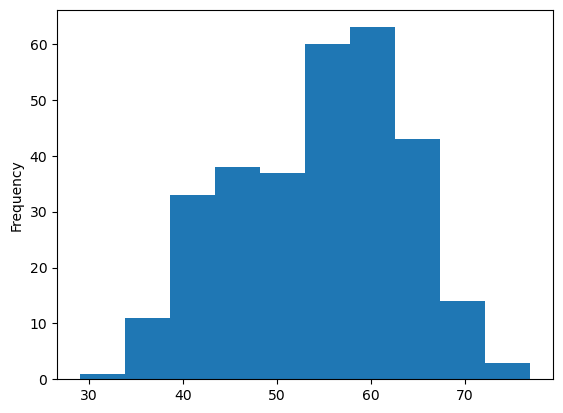

In [48]:
# Create a histogram of age

heart_disease["age"].plot.hist(bins=10)
plt.show()

In [49]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


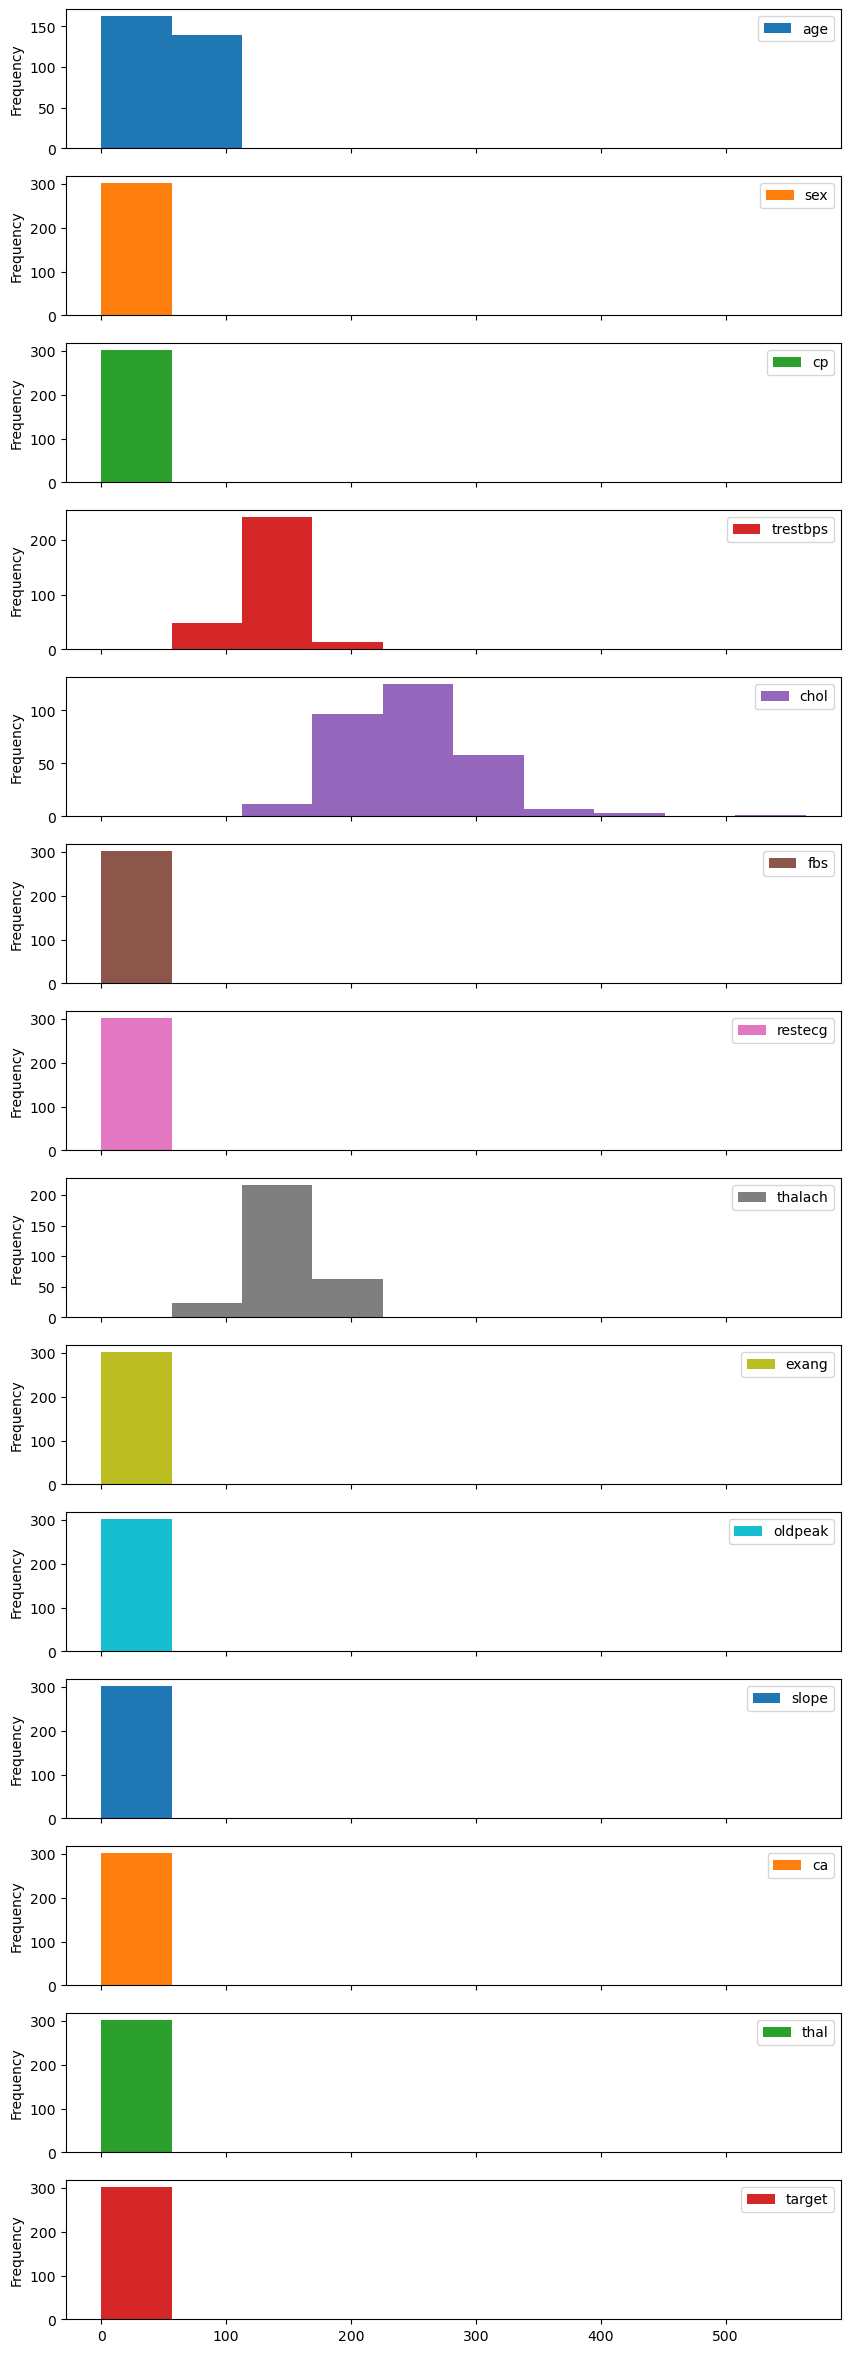

In [50]:
heart_disease.plot.hist(figsize=(10,30), subplots=True)
plt.show()

### Which one should you use? (pyplot vs matplotlib OO Method)

* When plotting something quickly, okay to use pyplot method
* When plotting something more advanced, use the OO method

In [51]:
over_50 = heart_disease[heart_disease["age"] > 50]
over_50

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [52]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


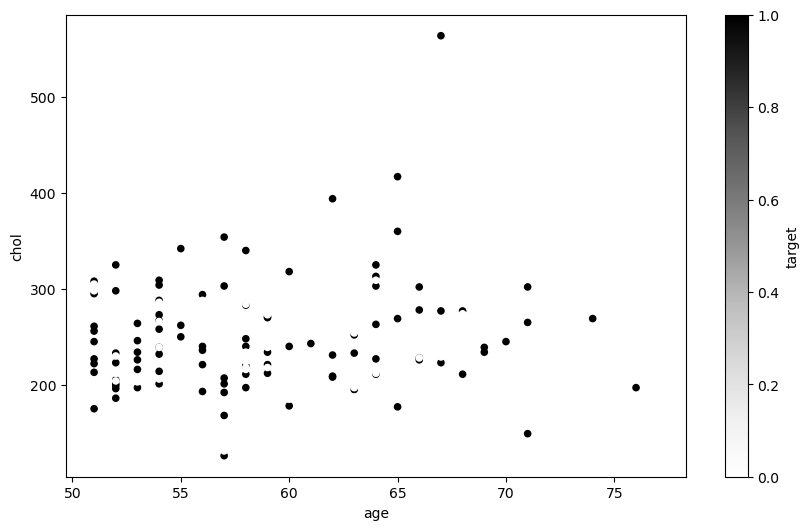

In [53]:
# Pyplot Method

over_50.plot(kind="scatter",
            x="age",
            y="chol",
            c="target",
            figsize=(10,6))
plt.show()

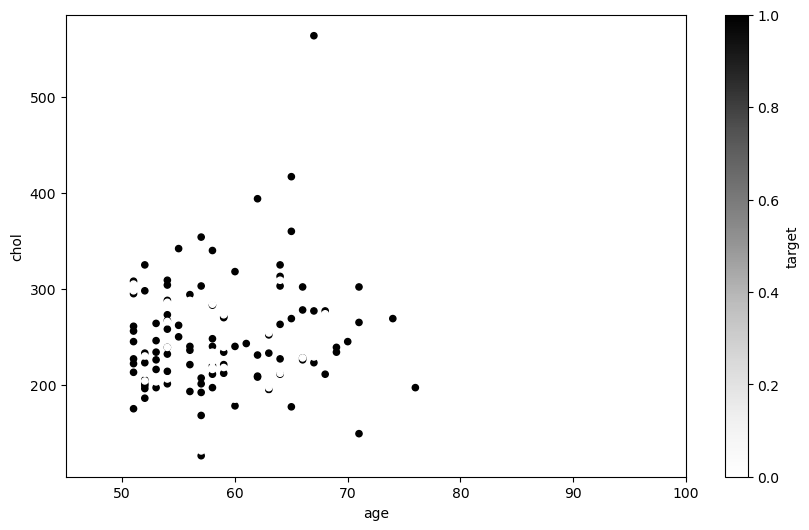

In [54]:
# OO Method mixed with Pyplot method

fix, ax = plt.subplots(figsize=(10,6))
over_50.plot(kind="scatter",
            x="age",
            y="chol",
            c="target",
            ax=ax)

ax.set_xlim([45, 100])

plt.show()

## OO Method from scratch

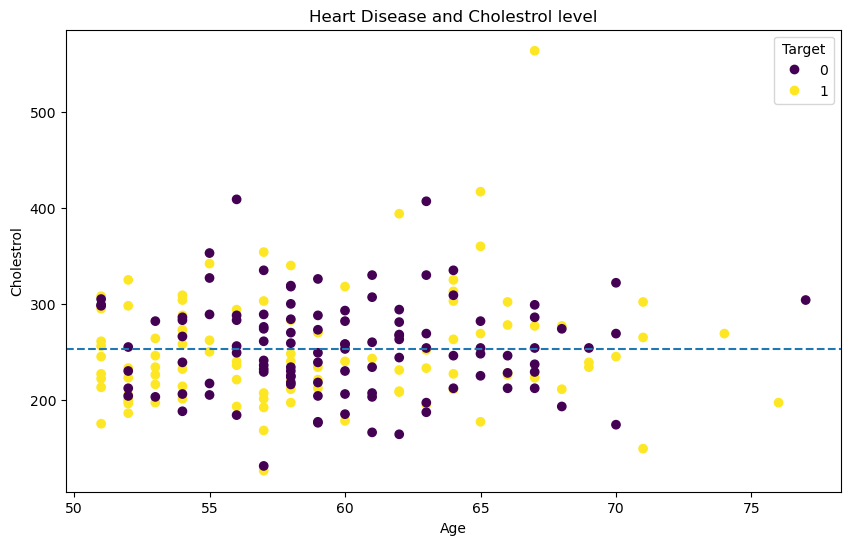

In [55]:
plt.close("all")

## OO Method from scratch

fig,ax = plt.subplots(figsize=(10,6))

# Plot the data
scatter = ax.scatter(x=over_50['age'], 
                    y=over_50['chol'],
                    c=over_50['target'])

# Customise the plot
ax.set(title="Heart Disease and Cholestrol level",
      xlabel='Age',
      ylabel='Cholestrol')

# Add a legent
ax.legend(*scatter.legend_elements(), title="Target")

# Add a horizontal line
ax.axhline(over_50['chol'].mean(),
          ls='--')


plt.show()

In [56]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


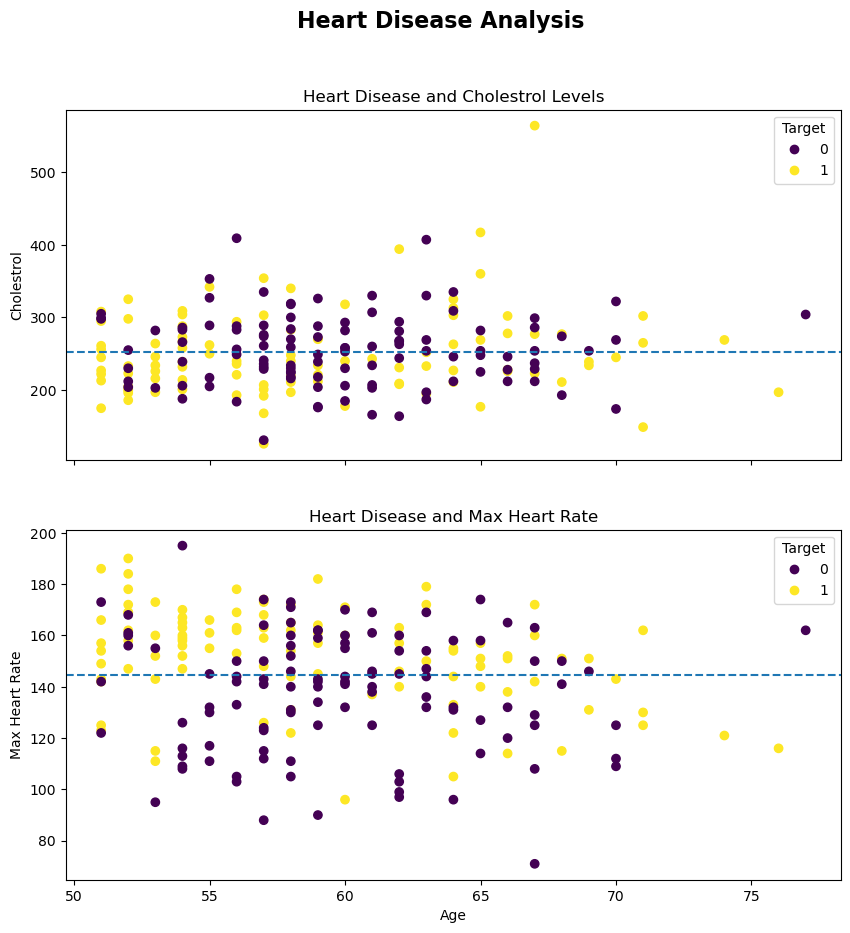

In [57]:
plt.close()

# Subplot of chol, age, thalach
fig, (ax0,ax1) = plt.subplots(nrows=2,
                              ncols=1,
                             figsize=(10, 10),
                             sharex=True)
                              
# Add data to ax0
scatter = ax0.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"])

# Customise ax0
ax0.set(title="Heart Disease and Cholestrol Levels",
       ylabel="Cholestrol")

# Add legend to ax0
ax0.legend(*scatter.legend_elements(),
           title="Target")

# Add a mean line
ax0.axhline(y=over_50["chol"].mean(),
           linestyle="--")

# Add data to ax1
scatter = ax1.scatter(x=over_50["age"],
                     y=over_50["thalach"],
                     c=over_50["target"])

# Customise ax1
ax1.set(title="Heart Disease and Max Heart Rate",
       xlabel="Age",
       ylabel="Max Heart Rate")

# Add legend to ax1
ax1.legend(*scatter.legend_elements(), title="Target")

# Add a mean line
ax1.axhline(y=over_50["thalach"].mean(),
            ls="--")

# Add a title to the figure
fig.suptitle("Heart Disease Analysis",
            fontsize=16,
            fontweight="bold")

plt.show()

## Customising Matplotlib plots and getting stylish

In [58]:
# See the different styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [59]:
car_sales["Price"].plot
plt.show()

In [60]:
plt.style.use('seaborn-v0_8-whitegrid')

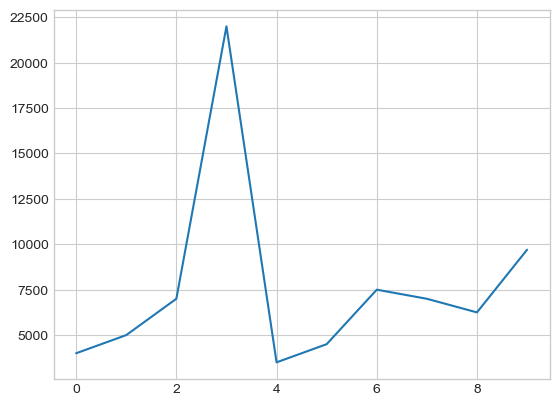

In [61]:
car_sales["Price"].plot()
plt.show()

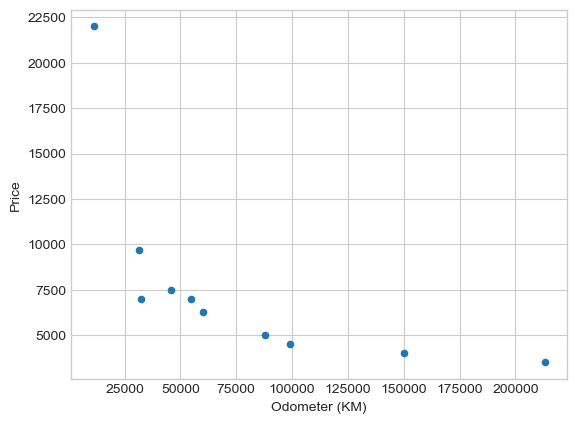

In [62]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter")
plt.show()

In [63]:
plt.style.use("ggplot")

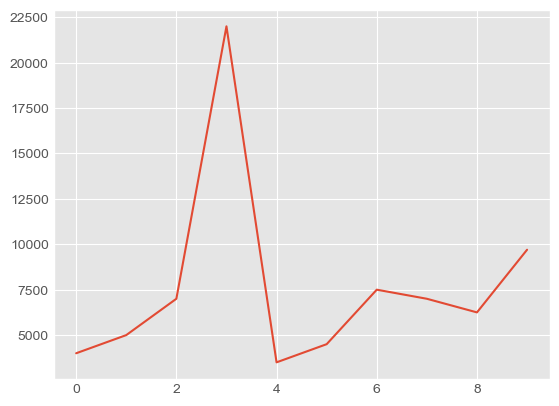

In [64]:
car_sales["Price"].plot()
plt.show()

In [65]:
# Create some data
x=np.random.randn(10,4)
x

array([[ 1.56385466, -0.00393292, -0.15112114,  0.21429171],
       [ 1.2096667 ,  1.18808   ,  0.98583276, -0.82121522],
       [ 0.54222045, -1.35034907, -0.5876388 , -1.71661455],
       [-2.14545237, -0.10034257,  1.33528818, -1.93239758],
       [ 0.20803319,  0.17960571,  0.92977274, -1.80629362],
       [ 1.18187647, -0.22382764, -0.21356009,  0.29981738],
       [ 0.9382068 ,  0.14393399, -0.15979644,  0.08648489],
       [ 0.16967349, -0.80313031, -1.45156465,  1.34574891],
       [-0.19679123, -1.45340296, -1.4700839 ,  0.41866308],
       [-0.85611076, -0.9643184 ,  1.76187056, -0.45968092]])

In [66]:
df = pd.DataFrame(x, columns=['a','b','c','d'])
df

,a,b,c,d
0,1.563855,-0.003933,-0.151121,0.214292
1,1.209667,1.188080,0.985833,-0.821215
2,0.542220,-1.350349,-0.587639,-1.716615
3,-2.145452,-0.100343,1.335288,-1.932398
4,0.208033,0.179606,0.929773,-1.806294
5,1.181876,-0.223828,-0.213560,0.299817
6,0.938207,0.143934,-0.159796,0.086485
7,0.169673,-0.803130,-1.451565,1.345749
8,-0.196791,-1.453403,-1.470084,0.418663
9,-0.856111,-0.964318,1.761871,-0.459681


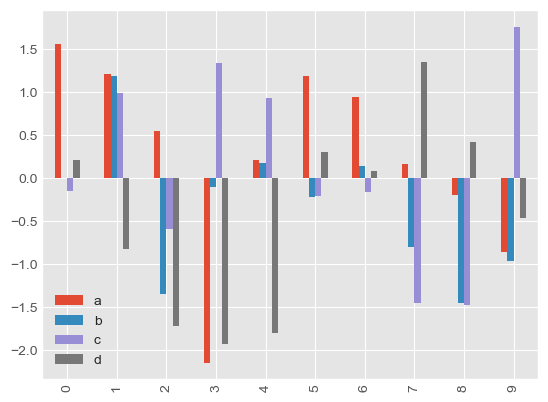

In [67]:
plt.close("all")
ax = df.plot(kind="bar")
type(ax)
plt.show()
            

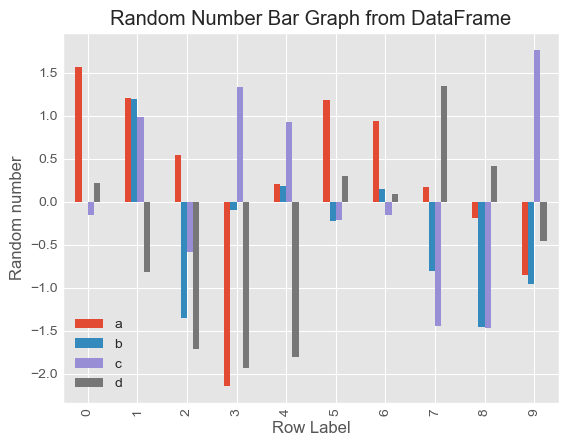

In [68]:
plt.close("all")

# Customise out plot with set method
ax = df.plot(kind="bar")

# Add some labels and title
ax.set(title="Random Number Bar Graph from DataFrame",
      xlabel="Row Label",
      ylabel="Random number")

# Make the legend visible
ax.legend().set_visible(True)


plt.show()

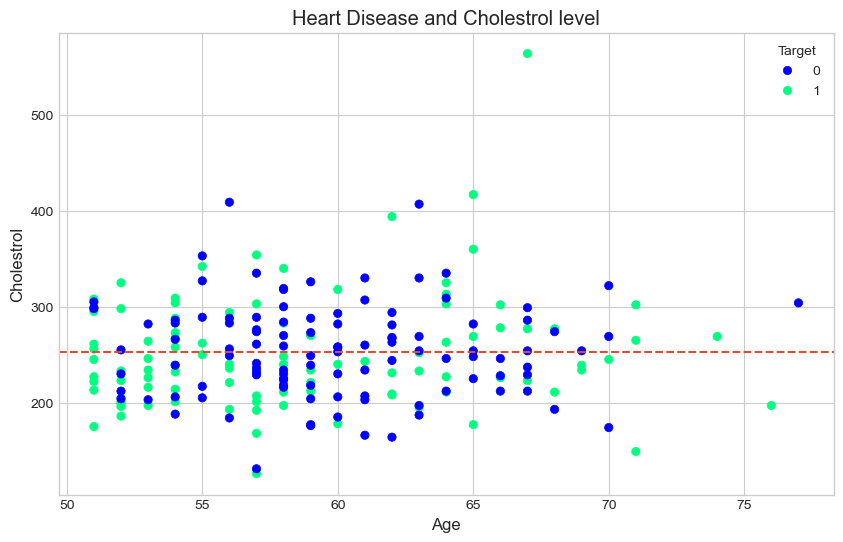

In [69]:
plt.close("all")

# set the style
plt.style.use("seaborn-v0_8-whitegrid")

## OO Method from scratch

fig,ax = plt.subplots(figsize=(10,6))

# Plot the data
scatter = ax.scatter(x=over_50['age'], 
                    y=over_50['chol'],
                    c=over_50['target'],
                    cmap="winter")  # this changes the colour scheme

# Customise the plot
ax.set(title="Heart Disease and Cholestrol level",
      xlabel='Age',
      ylabel='Cholestrol')

# Add a legent
ax.legend(*scatter.legend_elements(), title="Target")

# Add a horizontal line
ax.axhline(over_50['chol'].mean(),
          ls='--')


plt.show()

#### This plot shows some information about the heart disease dataset

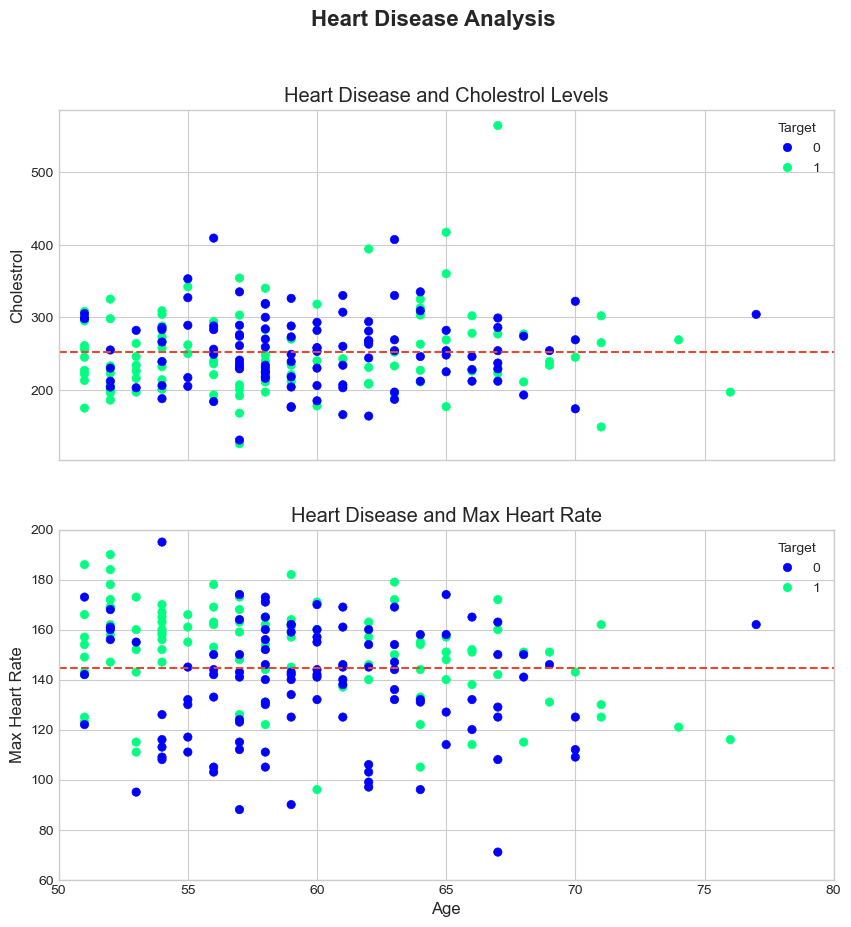

In [70]:
# Customising the x-axis and y-axis limitations


plt.close()

# Subplot of chol, age, thalach
fig, (ax0,ax1) = plt.subplots(nrows=2,
                              ncols=1,
                             figsize=(10, 10),
                             sharex=True)
                              
# Add data to ax0
scatter = ax0.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"],
                     cmap="winter")

# Customise ax0
ax0.set(title="Heart Disease and Cholestrol Levels",
       ylabel="Cholestrol")

# Add legend to ax0
ax0.legend(*scatter.legend_elements(),
           title="Target")
# Change the x-axis limits
ax0.set_xlim([50,80])

# Add a mean line
ax0.axhline(y=over_50["chol"].mean(),
           linestyle="--")

# Add data to ax1
scatter = ax1.scatter(x=over_50["age"],
                     y=over_50["thalach"],
                     c=over_50["target"],
                     cmap="winter")

# Customise ax1
ax1.set(title="Heart Disease and Max Heart Rate",
       xlabel="Age",
       ylabel="Max Heart Rate")
# Change hte ax1 x axis limits
ax1.set_xlim([50,80])
ax1.set_ylim([60,200])

# Add legend to ax1
ax1.legend(*scatter.legend_elements(), title="Target")

# Add a mean line
ax1.axhline(y=over_50["thalach"].mean(),
            ls="--")

# Add a title to the figure
fig.suptitle("Heart Disease Analysis",
            fontsize=16,
            fontweight="bold")

plt.show()

In [72]:
fig.savefig("heart_disease_analysis_plot_savedwith_code.png")